### Continuous Random Variable

The probability distribution of a continuous random variable is called *probability distribution functions* or *density curve*. ie normal distribution, exponential distribution and beta distribution.

All random variables (discrete or continuous) have a *Cumulative distribution function*. This is the function giving the probability that a random variable *X* is less than or equal to $x$

In [1]:
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
#from IPython.core.display import Image

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

## Uniform Distribution
Since any interval of numbers of equal width has an equal probability of being observed, the curve describing the distribution is a rectangle, with constant height across the interval and 0 height elsewhere.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

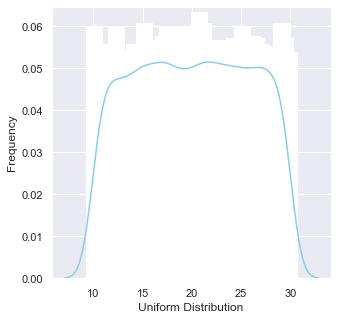

In [2]:
from scipy.stats import uniform

n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## Normal Distribution
Aka Gaussian distribution. A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean.

$f(x|\mu, \sigma^2)$ = $\frac{1}{\sqrt{2\pi\sigma^2}}$ * $e^-\frac{(x-\mu)^2}{2\sigma^2}$

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

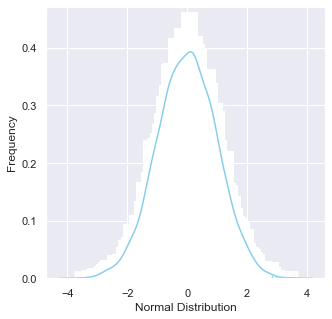

In [7]:
from scipy.stats import norm
# generate random numbers from N(0,1) mean of 0 and std of 1
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

## Poisson Distribution

**Why does Poisson exist and when to use it?**
To predict the probability of a given number of events occurring in a *fixed interval of time*
- how many visitors you get on your website a day
- how many clicks your ads get for the next month
- how many phone calls you get during your shift

> Every week, on average, 17 people clap for my blog post. 
I’d like to predict the # of ppl who would clap next week because I get paid weekly by those numbers.
What is the probability that exactly 20 people (or 10, 30, 50, etc.) will clap for the blog post next week?

A *Binomial distribution* requires the number of success $X$ in **n** repreated trials and the assumption of the probability of success $p$ to be constant over each trials. So then if we only had a fixed rate given, we can't exactly use binomial..

P(k events in interval) = $\frac{\lambda^k . e^\lambda}{K!}$

- The Poisson Distribution is asymmetric — it is always skewed toward the right.
- As $\lambda$ becomes bigger, the graph looks more like a normal distribution
- The average rate of events per unit time is constant
- Events are independent
- If the number of events per unit time follows a Poisson distribution, then the amount of time between events follows the exponential distribution. The Poisson distribution is discrete and the exponential distribution is continuous, yet the two distributions are closely related.

[extremely good read](https://towardsdatascience.com/poisson-distribution-intuition-and-derivation-1059aeab90d)
[jake vanderplas](https://jakevdp.github.io/blog/2018/09/13/waiting-time-paradox/)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

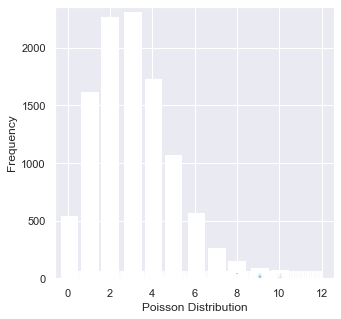

In [9]:
from scipy.stats import poisson
# mu is just lambda
data_poisson = poisson.rvs(mu=3, size=10000)

ax = sns.distplot(data_poisson,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

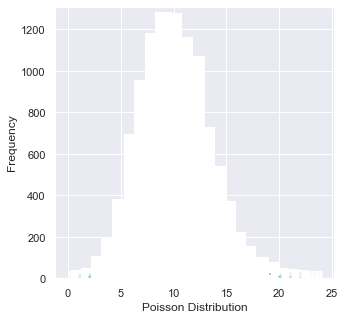

In [10]:
data_poisson = poisson.rvs(mu=10, size=10000)
# the higher the lambda, the more it will look like normal distribution
ax = sns.distplot(data_poisson,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## Exponential distribution

**Why do we need exponential distribution?**
To predict the amount of waiting time until the next event
- the amount of time until the customer finishes browsing and actually purchases something in your store
- the amount of time until the hardware fails
- the amount of time you need to wait until the bus arrives

> The definition of exponential distribution is the probability distribution of the time between the events in a Poisson process. If you think about it, the amount of time until the event occurs means during the waiting period, not a single event has happened. In another words, *Poisson(X=0)*

A PDF is the derivative of CDF
<img src="exponentialPDF.png">

Exponential formula = $\lambda e^{-\lambda x}$  <- time until it fails/success/arrive <br>
[crazy good source](https://medium.com/@rosca.valentin2012/here-is-my-take-on-the-exercises-11060d0b6e04)

### Waiting time modelling
1. The bus arrives every 15 mins on average. What is the probability that it takes less than 10 minutes for the next bus to arrive?


P(T > t) or *the probability of nothing happening during t time units* = $e^{-\lambda t}$

P(T>10) = $e^{-1/15 * 10}$ = $e^{-2/3}$ = 0.5134 

2. 90% of the buses arrive within how many minutes of the previous bus? <br>
P(T≤t) = 0.9 (how many time units are needed for 90% of events to happen) <br>
1-e^(-t/15) = 0.9 <br>
-> e^(-t/15) = 0.1 <br>
-> t = -15*ln(0.1) ≈ 34.5387

### Reliability (failure) modeling
The number of hours that AWS hardware can run before it needs a restart is exponentially distributed with an average of 8,000 hours (about a year).

1. You don’t have a backup server and you need an uninterrupted 10,000-hour run. What is the probability that you will be able to complete the run without having to restart the server? <br>
P(T > 10000 / 8000) = P(T > 10/8) = e^(-10/8) ≈ 0.2865

2. What is the probability that the server doesn’t require a restart between 12 months and 18 months?
24 * 7 = 168 hours per week -> 168 * 4 = 672 hours per month
12 months -> 8064 hours — 1.008 time units
18 months -> 12096 hours — 1.512 time units

remember, exponential distribution is *UNTIL SOMETHING HAPPENS* <br>
P(1.008 < T <= 1.512) = P(T <= 1.512) - P(1.008 < T)) = 1 - e^(-1.512) - e ^(-1.008) ≈ 0.4145

The probability of a server not requiring a restart is:
1 - P(1.008 < T <= 1.512) ≈ 0.5855

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

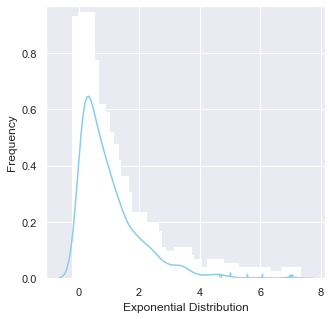

In [11]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## Gamma Distribution
The gamma distribution is a 2 parameter family of continuous probability distributions. While it is rarely used in its raw form but other popularly used distributions like exponential, chi-squared, erlang distributions are special cases of the gamma distribution. 

You can generate a gamma distributed random variable using scipy.stats module's gamma.rvs() method which takes shape parameter $\alpha$ as its argument. $\alpha$ controls the shape of the family of distributions.

$\alpha$ < 1 <br>
When a < 1, the Gamma distribution is exponentially shaped and asymptotic to both the vertical and horizontal axes

$\alpha$ = 1 <br>
A Gamma distribution with shape parameter a = 1 and scale parameter b is the same as an exponential distribution of scale parameter (or mean) b.

$\alpha$ > 1 <br>
When a is greater than one, the Gamma distribution assumes a mounded (unimodal), but skewed shape. The skewness reduces as the value of a increases.


**Why do we want or need it?**
The exponential distribution predicts the wait time until the *very first* event. The gamma distribution, on the other hand, predicts the wait time until the *k-th* event occurs.

Text(0.5, 1.0, 'Alpha = 0.5')

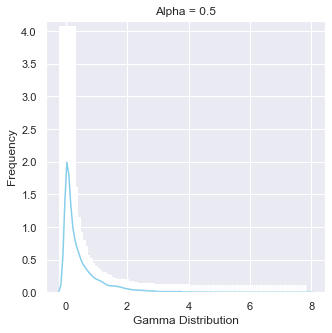

In [13]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=0.5, size=10000)

ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')
ax.set_title('Alpha = 0.5')

Text(0.5, 1.0, 'Alpha = 1')

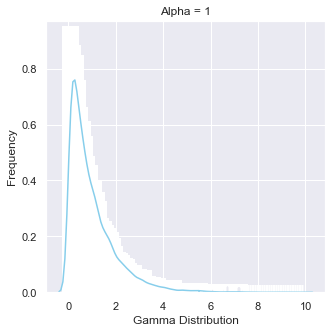

In [14]:
data_gamma = gamma.rvs(a=1, size=10000)

ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')
ax.set_title('Alpha = 1')

Text(0.5, 1.0, 'Alpha = 3')

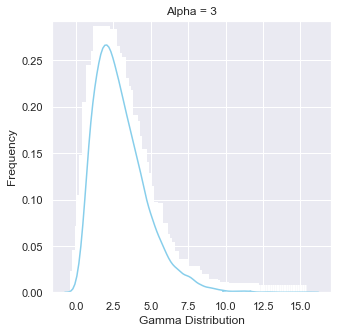

In [15]:
data_gamma = gamma.rvs(a=3, size=10000)

ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')
ax.set_title('Alpha = 3')